In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.utils
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

C:\Users\rshah5\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rshah5\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\rshah5\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
!pip install numpy

In [3]:
!pip install imblearn --user

In [4]:
df = pd.read_csv('C:/Users/rshah5/Desktop/ML/TMLC-Mega Guided Project/Project-01/Dataset/RTA Dataset.csv')

In [5]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
y.value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

In [8]:
X['Time'] = pd.to_datetime(X['Time']).dt.hour

In [9]:
def timeofday(x):
    if x > 6 and x< 12:
        return 'Morning'
    elif x>=12 and x<17:
        return 'Afternoon'
    elif x>=17 and x<22:
        return 'Evening'
    else:
        return 'Night'

In [10]:
X['Time_of_Day'] = X['Time'].apply(lambda x: timeofday(x))

In [11]:
X.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Time_of_Day
0,17,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Evening
1,17,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Evening
2,17,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Evening
3,1,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Night
4,1,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Night


In [12]:
X = X.drop(labels='Time',axis =1)

In [13]:
df = pd.concat([X,y],axis=1)

In [14]:
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Time_of_Day,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Evening,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Evening,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Evening,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Night,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Night,Slight Injury


In [15]:
df.dtypes

Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_severity              object
Work_of_casu

In [16]:
df.shape

(12316, 32)

In [17]:
df.value_counts().sum()

2889

In [18]:
df.isnull().sum()

Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality        

In [19]:
df.duplicated().sum()

0

In [20]:
df.describe(include=object).T

,count,unique,top,freq
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883
Defect_of_vehicle,7889,3,No defect,7777


Dropping Age_band_of_casualty column as most of the column is na

In [21]:
df.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Time_of_Day', 'Accident_severity'],
      dtype='object')

In [22]:
df = df.drop(['Defect_of_vehicle','Road_allignment', 'Types_of_Junction', 'Road_surface_type','Road_surface_conditions', 
  'Light_conditions', 'Weather_conditions','Type_of_collision','Number_of_casualties', 'Vehicle_movement',
  'Casualty_class','Sex_of_casualty',  'Work_of_casuality','Fitness_of_casuality', 'Pedestrian_movement'], axis=1)

In [23]:
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,Number_of_vehicles_involved,Age_band_of_casualty,Casualty_severity,Cause_of_accident,Time_of_Day,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,Residential areas,NaN,2,na,na,Moving Backward,Evening,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,Office areas,Undivided Two way,2,na,na,Overtaking,Evening,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,Recreational areas,other,2,31-50,3,Changing lane to the left,Evening,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,Office areas,other,2,18-30,3,Changing lane to the right,Night,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,Industrial areas,other,2,na,na,Overtaking,Night,Slight Injury


In [24]:
df_old = df.copy()

In [25]:
df.mode()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,Number_of_vehicles_involved,Age_band_of_casualty,Casualty_severity,Cause_of_accident,Time_of_Day,Accident_severity
0,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,Other,Two-way (divided with broken lines road marking),2.0,na,3,No distancing,Afternoon,Slight Injury
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evening,NaN


In [26]:
df = df.fillna(df.mode().iloc(0))

In [27]:
df.isnull().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Area_accident_occured          0
Lanes_or_Medians               0
Number_of_vehicles_involved    0
Age_band_of_casualty           0
Casualty_severity              0
Cause_of_accident              0
Time_of_Day                    0
Accident_severity              0
dtype: int64

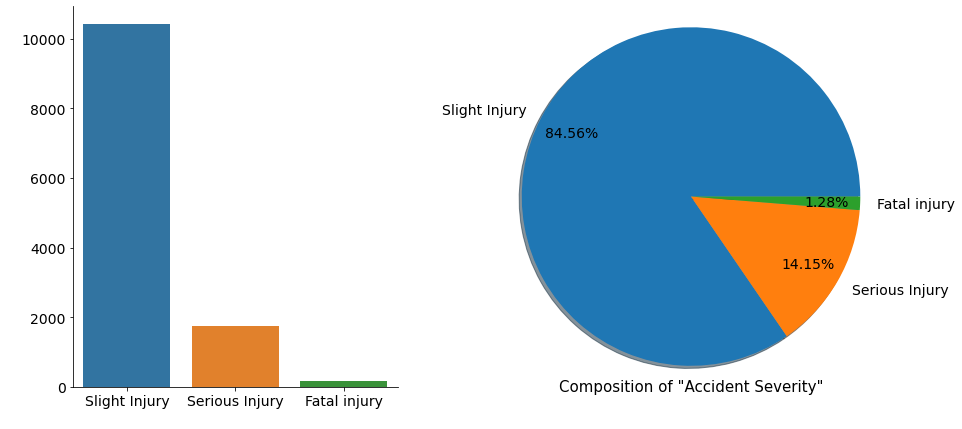

In [28]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["Accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(df["Accident_severity"].value_counts(),
        labels=list(df["Accident_severity"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
df = df.astype(str).apply(le.fit_transform)
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,Number_of_vehicles_involved,Age_band_of_casualty,Casualty_severity,Cause_of_accident,Time_of_Day,Accident_severity
0,1,0,1,1,1,0,1,4,4,10,0,1,5,3,9,1,2
1,1,1,1,5,1,4,12,4,2,7,5,1,5,3,16,1,2
2,1,0,1,5,1,0,6,4,3,1,7,1,1,2,0,1,1
3,3,0,1,5,1,2,12,1,3,7,7,1,0,2,1,3,2
4,3,0,1,5,1,1,0,4,2,4,7,1,5,3,16,3,2


In [31]:
df.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians',
       'Number_of_vehicles_involved', 'Age_band_of_casualty',
       'Casualty_severity', 'Cause_of_accident', 'Time_of_Day',
       'Accident_severity'],
      dtype='object')

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV


In [33]:
 
# split the dataset

train,test = train_test_split(df, test_size=0.33, random_state=0)

In [34]:
train['Accident_severity'].value_counts()

2    7007
1    1141
0     103
Name: Accident_severity, dtype: int64

In [35]:
# Class count
count_class_2, count_class_1,count_class_0 = train['Accident_severity'].value_counts()



In [36]:
train_0 = train[train['Accident_severity'] == 0]
train_1 = train[train['Accident_severity'] == 1]
train_2 = train[train['Accident_severity'] == 2]

In [37]:
train['Accident_severity'].value_counts()

2    7007
1    1141
0     103
Name: Accident_severity, dtype: int64

In [38]:
train_1_over = train_1.sample(count_class_2,replace=True)

In [39]:
train_0_over = train_0.sample(count_class_2,replace=True)

In [40]:
train_1_over = train_1_over.reset_index(drop=True)

In [41]:
train_0_over = train_0_over.reset_index(drop=True)

In [42]:
train_2 = train_2.reset_index(drop=True)

In [43]:
train = pd.concat([train_0_over,train_1_over,train_2],axis=0)

In [44]:
train.shape

(21021, 17)

In [45]:
x_train = train.iloc[:,:-1]

In [46]:
y_train = train.iloc[:,-1]

In [47]:
x_test = test.iloc[:,:-1]

In [48]:
y_test =test.iloc[:,-1]

In [49]:
y_test

8348     2
5386     2
1783     2
7077     0
5437     2
        ..
4986     2
5525     2
11941    2
8475     2
4320     2
Name: Accident_severity, Length: 4065, dtype: int32

In [50]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
model_RF.fit(x_train,y_train)
# evaluate the model
yhat = model_RF.predict(x_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy*100))

Accuracy: 83.321


In [51]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, yhat)

In [52]:
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.25      0.02      0.03       602
           2       0.84      0.99      0.91      3408

    accuracy                           0.83      4065
   macro avg       0.36      0.34      0.31      4065
weighted avg       0.74      0.83      0.77      4065



In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yhat)
print(cm)

[[   0    0   55]
 [   0   10  592]
 [   1   30 3377]]


# Hyper Parameter Tuning

In [54]:
from sklearn.model_selection import RandomizedSearchCV
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

random_grid = {'max_depth': max_depth}

In [55]:
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = model_RF, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


C:\Users\rshah5\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 11 is smaller than n_iter=100. Running 11 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END .......................................max_depth=10; total time=   1.0s
[CV] END .......................................max_depth=10; total time=   1.2s
[CV] END .......................................max_depth=10; total time=   1.1s
[CV] END .......................................max_depth=20; total time=   1.8s
[CV] END .......................................max_depth=20; total time=   1.8s
[CV] END .......................................max_depth=20; total time=   1.6s
[CV] END .......................................max_depth=30; total time=   1.9s
[CV] END .......................................max_depth=30; total time=   1.9s
[CV] END .......................................max_depth=30; total time=   1.8s
[CV] END .......................................max_depth=40; total time=   1.8s
[CV] END .......................................max_depth=40; total time=   1.5s
[CV] END .......................................max_depth=40; total time=   1.5s
[CV] END ...................

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110]},
                   random_state=42, verbose=2)

In [56]:
rf_random.best_params_

{'max_depth': 90}

In [57]:
yhat = rf_random.predict(x_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy*100))

Accuracy: 83.198


In [58]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, yhat)

C:\Users\rshah5\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rshah5\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rshah5\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [59]:
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.22      0.02      0.03       602
           2       0.84      0.99      0.91      3408

    accuracy                           0.83      4065
   macro avg       0.35      0.34      0.31      4065
weighted avg       0.74      0.83      0.77      4065



In [60]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [800]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [20]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1]
# Method of selecting samples for training each tree
bootstrap = [False]
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [800], 'max_features': ['sqrt'], 'max_depth': [20, None], 'min_samples_split': [2], 'min_samples_leaf': [1], 'bootstrap': [False]}


In [61]:
model_RF_all = RandomForestClassifier()

In [62]:
# search across 100 different combinations, and use all available cores
rf_random_all = RandomizedSearchCV(estimator = model_RF_all, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random_all.fit(x_train,y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Users\rshah5\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  23.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  19.2s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  16.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  18.9s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  16.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  18.3s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [False],
                                        'max_depth': [20, None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2],
                                        'n_estimators': [800]},
                   random_state=42, verbose=2)

In [63]:
rf_random_all.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [64]:
yhat = rf_random_all.predict(x_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy*100))

Accuracy: 83.764


In [65]:
from sklearn.ensemble import ExtraTreesClassifier

In [66]:
extree = ExtraTreesClassifier()
extree.fit(x_train,y_train)
yhat = extree.predict(x_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy*100))

Accuracy: 83.641


In [67]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [68]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=x_train, y=y_train)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=3,
)

extree_model = gsearch.fit(X=x_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 2,
  'n_estimators': 400},
 0.9150949442835373)

In [69]:
extree_tuned = ExtraTreesClassifier(ccp_alpha =  0.0,
                                      criterion = 'gini',
                                      max_depth = 11,
                                      min_samples_split = 3,
                                      n_estimators =  300)

extree_tuned.fit(x_train, y_train)
y_pred_tuned = extree_tuned.predict(x_test)



In [70]:
accuracy = accuracy_score(y_test, y_pred_tuned)
print('Accuracy: %.3f' % (accuracy*100))


Accuracy: 78.327


In [71]:
import joblib
joblib.dump(rf_random_all,'RandomForestClassifier.pkl')

['RandomForestClassifier.pkl']

In [72]:
joblib.dump(le,'label_encoder_feature.pkl')

['label_encoder_feature.pkl']

In [73]:
!pip install streamlit

  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19567 sha256=43389df122d97e9262e6f868d302b9d91c7b40371359bba9fba3a329d4aae00b
  Stored in directory: c:\users\rshah5\appdata\local\pip\cache\wheels\19\09\72\3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built validators
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
